# Assignment 1
## Problem 1
We begin by importing relevant libraries as well as the data for our analysis. We will use pandas for our dataframes and sklearn for our principal components analysis. Once we have imported the dataset, we can use .head() to view the first 5 rows to develop an idea regarding the data before we begin our analysis. 

In [66]:
import pandas as pd 
from sklearn.decomposition import PCA

wine = pd.read_csv("Wine.csv")
wine.head()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In order to do our principal components analysis (PCA), we will need to utilize numeric data. We can use .dtypes to observe the data types of our different columns. 

In [67]:
wine.dtypes

Type                     object
Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcalinity          float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280_OD315             float64
Proline                   int64
dtype: object

We can see all columns contain numeric data except the variable "Type". This will likely be the response variable to our predictors, so we will remove it from the dataset in our PCA variables. 

We can begin our PCA and take 2 components. 

In [68]:
pca = PCA(n_components=2)
pca_wine = pca.fit_transform(wine.loc[:,wine.columns != "Type"])
pca_wine_df = pd.DataFrame(data = pca_wine,columns=["PC1","PC2"])
pca_wine_df.head()

,PC1,PC2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


We see PC1 contains a far greater influence on our data. We can use the explained variance to see how much more significant PC1 is as opposed to PC2. 

In [69]:
print("Explained variance for top 2 PC")
for p in pca.explained_variance_ratio_:
    num = float(f"{p:.6f}")
    print(num * 100)

Explained variance for top 2 PC
99.8091
0.1736


We can see that our 1st principal component explains 99.8091% of the variance. Why is this? 

**Due to the fact that our data is not normalized, the larger amounts are likely to more heavily influence the variance, as any variance in those variables will overshadow the variance of the smaller, less significant components. We can compensate for this explanation by normalizing the data and reconducting our PCA.** 

## Problem 2
We observed that in our non-normalized dataset, one principal component heavily influences variance, to the tune of 99.81% variance explained. We can adjust our data through normalization. We will start this by importing an extra library from scikit-learn. 

In [70]:
from sklearn.preprocessing import normalize

Now that we have imported the normalize function, we can go ahead and normalize all of the data except "Type". 

In [71]:
num_wine = wine.loc[:,wine.columns != "Type"]
d = normalize(num_wine)
scaled_wine = pd.DataFrame(data=d,columns=num_wine.columns)
scaled_wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


We can see from the data above that all of our data is now between the values of 0 and 1, hence normalized. This negates the effect of large values overly influencing the variance. We can now conduct our PCA by utilizing our scaled_wine dataframe. Because the assignment only specifies building a Scatterplot with PC1 and PC2, we will only utilize pca with 2 components. 

In [72]:
pca = PCA(n_components=2)
pca_wine = pca.fit_transform(scaled_wine)
scaled_wine_df = pd.DataFrame(pca_wine,columns=["PC1","PC2"])
scaled_wine_df.head()

,PC1,PC2
0,-0.037425,0.008566
1,-0.061292,0.006263
2,-0.069781,-0.000652
3,-0.079461,0.001433
4,0.005421,0.005151


We now see a much closer relationship between the first two compoenents. We can observe the explained variance as well before plotting our data to see how much of the variance is explained by both components. 

In [73]:
print("Explained variance")
for p in pca.explained_variance_ratio_:
    num = float(f"{p:.6f}")
    print(num * 100)

Explained variance
97.7288
1.3422999999999998


We will see a very heavy scewing toward PC1; however, now that the data has been standardized, we have a truer understanding of the variance explained by PC 1 and recognize that PC 2 does also contribute towards the variance. Together they account for 99.07 of the variance. 

Now we can go ahead and plot our wine types with the principal components on the scatterplot as the assignment asks.

<Axes: xlabel='PC1', ylabel='PC2'>

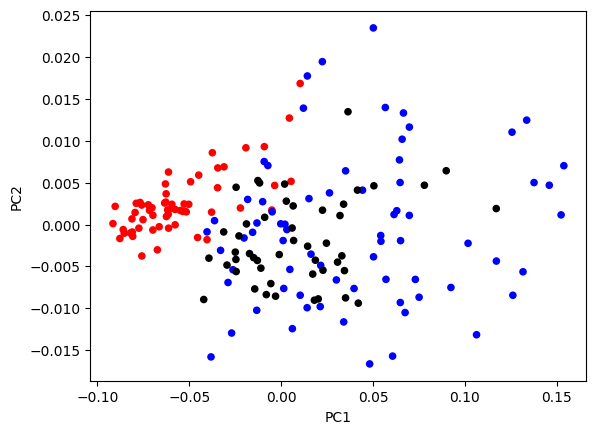

In [74]:
colorMap = {"A":"red","B":"blue","C":"black"}
scaled_wine_df.plot.scatter("PC1","PC2",c=[colorMap[t] for t in wine.Type])

Above we have plotted the three types of wine (A,B,C) utilizing our principal components 1 and 2 in the X and Y axis respectively. This scatterplot enables us to see groupings of wine types based on the principal components. We see much of the points centered around the axis (0.00,0.00) with some outliers on the far side of PC1.Based on this graph, we would say PC1 and PC2 can help identify groupings of wines, specifically A and B.  